# Which Shit-Spattered NYC Beach Should You Swim at This Summer?
Looking at fecal bacteria counts in samples taken from marine water around NYC.

In [128]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from cycler import cycler
from pywaffle import Waffle
%matplotlib inline 

In [72]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'sans-serif',
    'font.sans-serif' : 'Tahoma',
    'axes.facecolor' : '#ffffff',
    'axes.axisbelow':True, 
    'axes.grid' : True,
    'grid.color' : '#bec0c2',
    'grid.linestyle' : 'dotted',
    'axes.spines.left'   : False,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right' : False,
    'axes.prop_cycle': cycler('color', ['#e81c61', '#ffb845', '#fc6b4a', '#f9f871', '#31517a', '#3f0092']),
    'xtick.bottom'  : False,
    'ytick.left': False,
    'figure.titlesize' : 'large', 
    'figure.titleweight' : 'bold',
    'figure.facecolor' : '#ffffff',
    'text.color' : '#595959',
    'axes.labelcolor' : '#595959',
    'xtick.color' : '#595959',
    'ytick.color' : '#595959',
    'legend.loc' : 'best',
    'legend.fancybox'    : True,
    'legend.frameon'     : True,
    'legend.edgecolor'     : '0.9',
    'legend.markerscale'   : '0.5',
    'lines.marker'      : None,
    'lines.markersize'  : 3,           
})

In [3]:
df = pd.read_csv('DOHMH_Beach_Water_Quality_Data.csv')

In [4]:
df

,Sample ID,Sample Date,Beach Name,Sample Location,Enterococci Results,Units or Notes
0,050514CP13,05/05/2014,MIDLAND BEACH,Center,20.0,MPN/100 ml
1,062011GR04,06/20/2011,MANHATTAN BEACH,Left,NaN,Result below detection limit
2,072808BH09,07/28/2008,MIDLAND BEACH,Right,28.0,MPN/100 ml
3,051214CP36,05/12/2014,SOUTH BEACH,Right,4.0,MPN/100 ml
4,081511KB07,08/15/2011,CEDAR GROVE,Left,360.0,MPN/100 ml
5,062909KB01,06/29/2009,MANHATTAN BEACH,Left,8.0,MPN/100 ml
6,082112KB07,08/21/2012,CEDAR GROVE,Left,20.0,MPN/100 ml
7,072015GR06,07/20/2015,MANHATTAN BEACH,Right,NaN,Result below detection limit
8,082613CP16,08/26/2013,SOUTH BEACH,Center,12.0,MPN/100 ml
9,081709KB07,08/17/2009,MIDLAND BEACH,Left,4.0,MPN/100 ml


In [5]:
df.dtypes

Sample ID               object
Sample Date             object
Beach Name              object
Sample Location         object
Enterococci Results    float64
Units or Notes          object
dtype: object

In [6]:
# Beaches surveyed
df['Beach Name'].value_counts()

DOUGLASTON HOMEOWNERS ASSOCIATION         921
MORRIS YACHT AND BEACH CLUB               893
KINGSBOROUGH COMMUNITY COLLEGE            888
SOUTH BEACH                               873
DANISH AMERICAN BEACH CLUB                859
MIDLAND BEACH                             855
WOLFE'S POND PARK                         855
AMERICAN TURNERS                          854
WHITE CROSS FISHING CLUB                  852
GERRITSEN/KIDDIE BEACH                    850
MANHEM BEACH CLUB                         849
ORCHARD BEACH                             843
TRINITY DANISH YOUNG PEOPLE'S SOCIETY     841
SEAGATE BEACH - 42ND STREET               841
MANHATTAN BEACH                           832
SCHUYLER HILL CIVIC ASSOCIATION           822
SEAGATE BEACH - 38TH STREET               816
SI YMCA OF GREATER NEW YORK               773
WHITESTONE BOOSTER CIVIC  ASSOCIATION     690
LOCUST POINT YACHT CLUB                   555
WEST FORDHAM STREET ASSOCIATION           549
CEDAR GROVE                       

In [7]:
df['EnterococciResults'] = df['Enterococci Results'].fillna(0)

In [8]:
df['date'] = pd.to_datetime(df['Sample Date'], format="%m/%d/%Y")

In [9]:
df_2018 = df[df.date >= '01/01/2018']

In [10]:
df_2018['Beach Name'].value_counts()

CEDAR GROVE                              36
SCHUYLER HILL CIVIC ASSOCIATION          31
WOLFE'S POND PARK                        30
SEAGATE BEACH - 42ND STREET              30
SOUTH BEACH                              30
ORCHARD BEACH                            30
SI YMCA OF GREATER NEW YORK              30
MANHEM BEACH CLUB                        30
MIDLAND BEACH                            30
GERRITSEN/KIDDIE BEACH                   30
SEAGATE BEACH - 38TH STREET              30
MORRIS YACHT AND BEACH CLUB              30
MANHATTAN BEACH                          30
LOCUST POINT YACHT CLUB                  30
DOUGLASTON HOMEOWNERS ASSOCIATION        30
AMERICAN TURNERS                         30
TRINITY DANISH YOUNG PEOPLE'S SOCIETY    30
KINGSBOROUGH COMMUNITY COLLEGE           30
WHITESTONE BOOSTER CIVIC  ASSOCIATION    30
DANISH AMERICAN BEACH CLUB               30
WHITE CROSS FISHING CLUB                 30
WEST FORDHAM STREET ASSOCIATION          30
CONEY ISLAND WEST 8TH - PIER    

In [11]:
# Under the New  York  State  Sanitary  Code and  the  New  York  City  Health  Code, 
#Enterococci concentrations  for  a  single  sample  shall  not  exceed  104  Colony  Forming  Units  (CFUs)  
# per 100  mL (61 CFUs  per 100 ml for fresh water)

#1 MPN = 1 CFU 

df_2018_nast = df_2018[df_2018.EnterococciResults > 104]
df_2018_nast

,Sample ID,Sample Date,Beach Name,Sample Location,Enterococci Results,Units or Notes,EnterococciResults,date
20162,DF05141806,05/14/2018,SI YMCA OF GREATER NEW YORK,Right,140.0,MPN/100 ml,140.0,2018-05-14
20222,DF05141812,05/14/2018,CEDAR GROVE,Right,900.0,MPN/100 ml,900.0,2018-05-14
20265,050718DF05,05/07/2018,SI YMCA OF GREATER NEW YORK,Center,460.0,MPN/100 ml,460.0,2018-05-07
20280,DF05141810,05/14/2018,CEDAR GROVE,Left,620.0,MPN/100 ml,620.0,2018-05-14
20304,DF05141811,05/14/2018,CEDAR GROVE,Center,900.0,MPN/100 ml,900.0,2018-05-14
20339,CP05141803,05/14/2018,GERRITSEN/KIDDIE BEACH,Right,340.0,MPN/100 ml,340.0,2018-05-14
20353,CP05141802,05/14/2018,GERRITSEN/KIDDIE BEACH,Center,210.0,MPN/100 ml,210.0,2018-05-14
20356,050718DF04,05/07/2018,SI YMCA OF GREATER NEW YORK,Left,2100.0,MPN/100 ml,2100.0,2018-05-07
20361,CP05141801,05/14/2018,GERRITSEN/KIDDIE BEACH,Left,170.0,MPN/100 ml,170.0,2018-05-14
20440,CP1805220600-1.2,05/22/2018,DOUGLASTON HOMEOWNERS ASSOCIATION,Center,1100.0,MPN/100 ml,1100.0,2018-05-22


Text(0.5,0.91,'Beaches with bacteria samples exceeding the NYC Health Code')

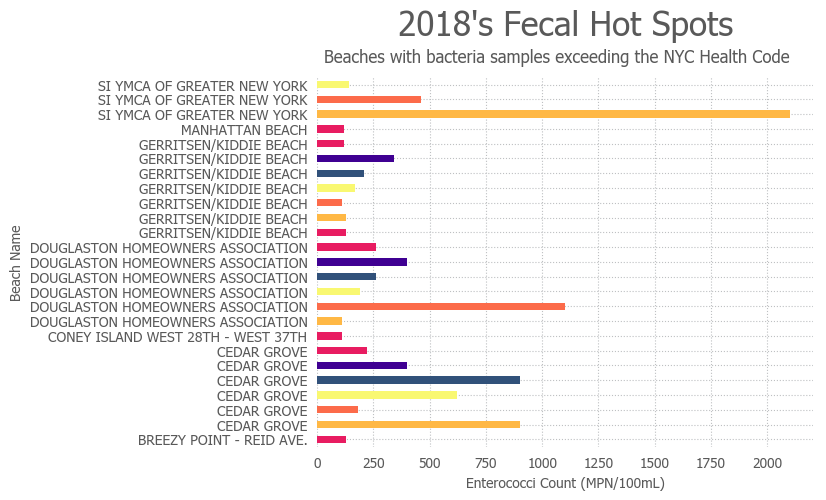

In [118]:
ax = df_2018_nast.sort_values(by='Beach Name').plot(kind='barh', x='Beach Name', y='EnterococciResults')
ax.set_title("2018's Fecal Hot Spots", pad=30, fontsize=24)
ax.legend_.remove()
ax.set_xlabel('Enterococci Count (MPN/100mL)')
plt.gcf().text(0.5, 0.91, "Beaches with bacteria samples exceeding the NYC Health Code", ha='center', fontsize=12) 

In [15]:
df_2018_clean = df_2018[df_2018.EnterococciResults == 0]
df_2018_clean['Beach Name'].value_counts()

ORCHARD BEACH                            22
SEAGATE BEACH - 38TH STREET              16
WOLFE'S POND PARK                        16
SEAGATE BEACH - 42ND STREET              16
CEDAR GROVE                              15
MIDLAND BEACH                            15
MORRIS YACHT AND BEACH CLUB              15
SCHUYLER HILL CIVIC ASSOCIATION          14
WEST FORDHAM STREET ASSOCIATION          14
SOUTH BEACH                              12
LOCUST POINT YACHT CLUB                  11
MANHATTAN BEACH                           9
DANISH AMERICAN BEACH CLUB                9
WHITESTONE BOOSTER CIVIC  ASSOCIATION     8
CONEY ISLAND WEST 28TH - WEST 37TH        7
CONEY ISLAND OCEAN PKWY - WEST 8TH        7
SI YMCA OF GREATER NEW YORK               7
CONEY ISLAND WEST 8TH - PIER              6
MANHEM BEACH CLUB                         6
GERRITSEN/KIDDIE BEACH                    6
CONEY ISLAND BR. 15TH - 6TH               5
BREEZY POINT - 219TH STREET               5
KINGSBOROUGH COMMUNITY COLLEGE  

In [47]:
df_2018_nast['colors'] = ['red' if x == 'CEDAR GROVE' else 'green' for x in df_2018_nast['Beach Name']]

/Users/angelawang/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
pivot_df = df_2018_nast.pivot(index='colors', columns='Beach Name', values='EnterococciResults').reset_index().fillna(0)

ValueError: Index contains duplicate entries, cannot reshape

In [63]:
df.groupby('Beach Name').EnterococciResults.max()

Beach Name
AMERICAN TURNERS                           3500.0
BEECHHURST PROPERTY OWNERS ASSOCIATION      660.0
BREEZY POINT - 219TH STREET                2100.0
BREEZY POINT - REID AVE.                    130.0
CEDAR GROVE                                3300.0
CONEY ISLAND BR. 15TH - 6TH                 560.0
CONEY ISLAND BR. 6TH - OCEAN PKWY          3800.0
CONEY ISLAND OCEAN PKWY - WEST 8TH         3100.0
CONEY ISLAND WEST 16TH - WEST 27TH          560.0
CONEY ISLAND WEST 28TH - WEST 37TH         1700.0
CONEY ISLAND WEST 8TH - PIER               1900.0
DANISH AMERICAN BEACH CLUB                 5100.0
DOUGLASTON HOMEOWNERS ASSOCIATION         12000.0
GERRITSEN/KIDDIE BEACH                     4500.0
KINGSBOROUGH COMMUNITY COLLEGE             2300.0
LOCUST POINT CIVIC ASSOCIATION              170.0
LOCUST POINT YACHT CLUB                     740.0
MANHATTAN BEACH                             740.0
MANHEM BEACH CLUB                          2200.0
MIDLAND BEACH                          

In [65]:
df.sort_values(by='Beach Name')

,Sample ID,Sample Date,Beach Name,Sample Location,Enterococci Results,Units or Notes,EnterococciResults,date
17531,080216IM09,08/02/2016,AMERICAN TURNERS,Right,80.0,MPN/100 ml,80.0,2016-08-02
8147,082515SM06,08/25/2015,AMERICAN TURNERS,Right,4.0,MPN/100 ml,4.0,2015-08-25
14760,050906IM15,05/09/2006,AMERICAN TURNERS,Right,36.0,MPN/100 ml,36.0,2006-05-09
14772,050608IM09,05/06/2008,AMERICAN TURNERS,Right,4.0,MPN/100 ml,4.0,2008-05-06
17639,061416JL07,06/14/2016,AMERICAN TURNERS,Left,12.0,MPN/100 ml,12.0,2016-06-14
8164,071806ZK15,07/18/2006,AMERICAN TURNERS,Right,4.0,MPN/100 ml,4.0,2006-07-18
5448,070709GR07,07/07/2009,AMERICAN TURNERS,Left,NaN,Result below detection limit,0.0,2009-07-07
5469,072214CP09,07/22/2014,AMERICAN TURNERS,Right,NaN,Result below detection limit,0.0,2014-07-22
11456,051811SG14,05/18/2011,AMERICAN TURNERS,Center,480.0,MPN/100 ml,480.0,2011-05-18
5433,072406ZK10,07/24/2006,AMERICAN TURNERS,Left,NaN,Result below detection limit,0.0,2006-07-24


In [122]:
# What about NYC"s most popular beaches? Look at Coney Island & The Rockaways
df_coney_2018 = df_2018[df_2018['Beach Name'].str.contains('CONEY')]

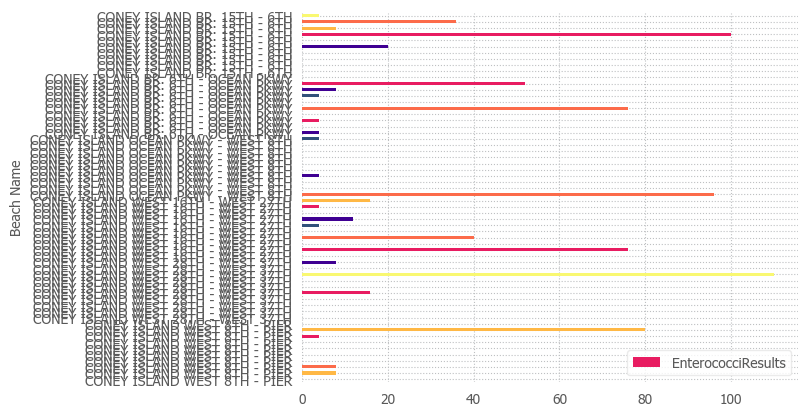

In [123]:
df_coney_2018.sort_values(by='Beach Name', ascending=False).plot(kind='barh', x='Beach Name', y='EnterococciResults')

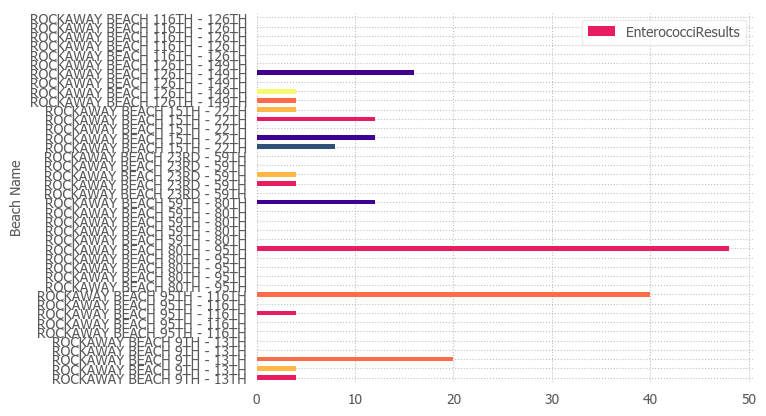

In [127]:
df_rockaway_2018 = df_2018[df_2018['Beach Name'].str.contains('ROCKAWAY')]
df_rockaway_2018.sort_values(by='Beach Name', ascending=False).plot(kind='barh', x='Beach Name', y='EnterococciResults')

In [ ]:
# Could clean the above 2 charts up in illustrator, but I'm not sure if bar charts are the way to go here
# since there are many blank areas where no enterococci bacteria was detected
# averages aren't ideal either, but will try them for now

In [133]:
df_coney_2018.groupby('Beach Name').mean().reset_index()

,Beach Name,Enterococci Results,EnterococciResults
0,CONEY ISLAND BR. 15TH - 6TH,33.600000,16.8
1,CONEY ISLAND BR. 6TH - OCEAN PKWY,24.666667,14.8
2,CONEY ISLAND OCEAN PKWY - WEST 8TH,34.666667,10.4
3,CONEY ISLAND WEST 16TH - WEST 27TH,25.333333,15.2
4,CONEY ISLAND WEST 28TH - WEST 37TH,44.666667,13.4
5,CONEY ISLAND WEST 8TH - PIER,25.000000,10.0


In [132]:
df_rockaway_2018.groupby('Beach Name').mean().reset_index()

,Beach Name,Enterococci Results,EnterococciResults
0,ROCKAWAY BEACH 116TH - 126TH,NaN,0.0
1,ROCKAWAY BEACH 126TH - 149TH,8.000000,4.8
2,ROCKAWAY BEACH 15TH - 22TH,9.000000,7.2
3,ROCKAWAY BEACH 23RD - 59TH,4.000000,1.6
4,ROCKAWAY BEACH 59TH - 80TH,12.000000,2.4
5,ROCKAWAY BEACH 80TH - 95TH,48.000000,9.6
6,ROCKAWAY BEACH 95TH - 116TH,22.000000,8.8
7,ROCKAWAY BEACH 9TH - 13TH,9.333333,5.6


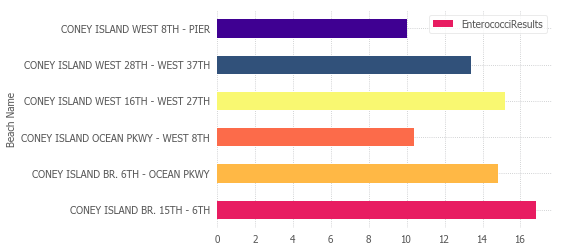

In [144]:
#fig, ax = plt.subplots()
df_coney_2018.groupby('Beach Name').mean().plot(kind='barh', y='EnterococciResults') #ax=ax)

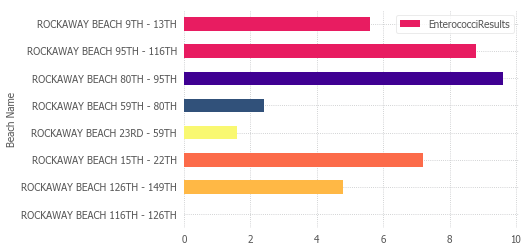

In [145]:
df_rockaway_2018.groupby('Beach Name').mean().plot(kind='barh', y='EnterococciResults')

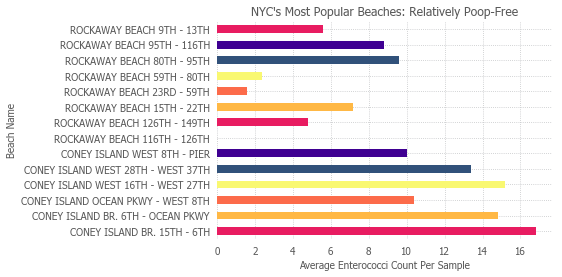

In [154]:
df_coney_rockaway_2018 = df_2018[df_2018['Beach Name'].str.contains('CONEY') | df_2018['Beach Name'].str.contains('ROCKAWAY')]
ax = df_coney_rockaway_2018.groupby('Beach Name').mean().plot(kind='barh', y='EnterococciResults', title="NYC's Most Popular Beaches: Relatively Poop-Free")
ax.set_xlabel('Average Enterococci Count Per Sample')
ax.legend_.remove()